<a href="https://colab.research.google.com/github/johnryantaylor/QCES/blob/main/radiation_balance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atmospheric heat budget
This notebook implements a single box atmospheric heat budget, following the derivation in the AOCD lectures.

For details, see textbook: Introduction to Atmosphere Physics by David Andrews.

### 1. Equilibrium temperature

In this section, we calculate the equilibrium temperature at the surface of the Earth

First, set some constants:

In [ ]:
alpha = 0.3 # Earth's albedo (non-dimensional)
Ts = 0.9 # Transmittance for shortwave radiation (non-dimensional)
Tl = 0.2 # Transmittance for longwave radiation (non-dimensional)
F0 = 342 # Incoming solar flux in W/m^2 (averaged over the Earth's surface)
sigma = 5.7e-8 # Stefan-Boltzmann constant (W/m^2/K^4)

Now, calculate the temperature of the Earth's surface (ground) in degrees Kelvin:

In [ ]:
Fg = F0 * ((1 - alpha) * Ts + 1 - alpha * Ts**2.0)/(1 + Tl)
Fa = (1 - alpha * Ts**2.0) * F0 - Tl * Fg
theta_g = (Fg / sigma)**0.25
theta_a = (Fa / (sigma * (1 - Tl)))**0.25
print(f'The equilibrium temperature of the surface of the Earth is {theta_g-273.15:.1f}ºC')
print(f'The equilibrium temperature of the atmosphere is {theta_a-273.15:.1f}ºC')

The equilibrium temperature of the surface of the Earth is 15.4ºC
The equilibrium temperature of the atmosphere is -22.6ºC


### 2. Time-dependent model

In this section, we implement a model for the temperature of the atmosphere as a function of time. This can be used to model the response of the atmosphere to a prescribed change in greenhouse gases.

First, define some constants:

In [ ]:
c_pa = 5e21 # Heat capacity of the atmosphere (J/ºC)
c_po = 5.6e24 # Heat capacity of the ocean (J/ºC)
A_e = 5e14 # surface area of the earth (m^2)

We will start with the equilibrium state calculated above. Then, to represent a doubling in atmospheric CO2 (from 320 ppmv to 720 ppmv) we will abruptly decrease Tl by 0.02.

In [ ]:
Tl = Tl - 0.02

The code below timesteps the coupled equations using Explicit Euler. Note that the equilibrium values of $\theta_g$ and $\theta_a$ are used as initial conditions and should be calculated above before running the code below.

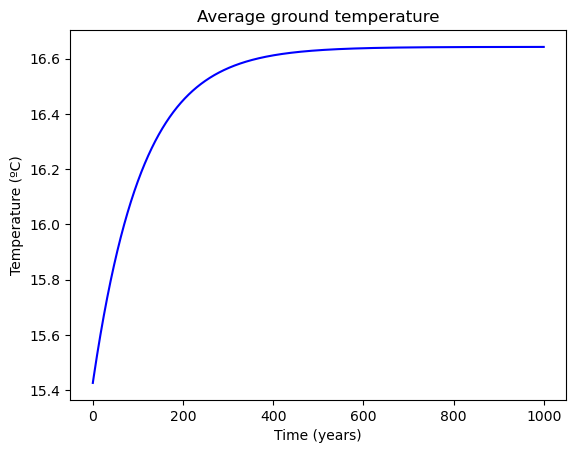

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t_start = 0  # start time (time elapsed since doubling of CO2)
t_end = 1000 * 365 * 24 * 3600  # end time in seconds
Nt = 100000  # number of timesteps

t = np.linspace(t_start, t_end, Nt)  # Create a vector of times
dt = (t[-1] - t[0]) / (len(t) - 1) # Set the timestep

theta_a_save = np.zeros(Nt) # Create an empty vector to store the time-dependent atmospheric temperature
theta_g_save = np.zeros(Nt) # Create an empty vector to store the time-dependent ground temperature

# Set the initial condition based on the equilibrium calculated above
theta_a_save[0] = theta_a
theta_g_save[0] = theta_g

for k in range(1, Nt): # loop over the number of timesteps
    Fg = sigma * theta_g**4.0 # longwave heat flux from ground
    Fa = (1 - Tl) * sigma * theta_a**4.0 # longwave heat flux from atmosphere
    Fg_net = Ts * F0 * (1 - alpha) + Fa - Fg # The net heat flux into the ground
    Fa_net = (1 - Ts) * F0 + alpha * Ts * F0 * (1 - Ts) + Fg * (1 - Tl) - 2 * Fa # The net heat flux into the atmosphere
    theta_a = theta_a + dt * A_e * Fa_net / c_pa # Calculate the new atmospheric temperature
    theta_g = theta_g + dt * A_e * Fg_net / c_po # Calculate the new ground temperature
    theta_a_save[k] = theta_a # save the atmospheric temperature
    theta_g_save[k] = theta_g # save the ground temperature

plt.plot(t/365/24/3600,theta_g_save-273.15,'b-')
plt.title('Average ground temperature')
plt.xlabel('Time (years)')
plt.ylabel('Temperature (ºC)')
plt.show()